In [2]:
import numpy as np

# Evalutation

## Investigating Model Predictions

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

In [131]:
# Create the dataset
X, y = load_boston(return_X_y=True)

# Fit regression model
model = RandomForestRegressor()
model.fit(X, y)

# Predict
predictions = model.predict(X)

### Plotting Residuals

In [132]:
from evaluation import plot_residuals

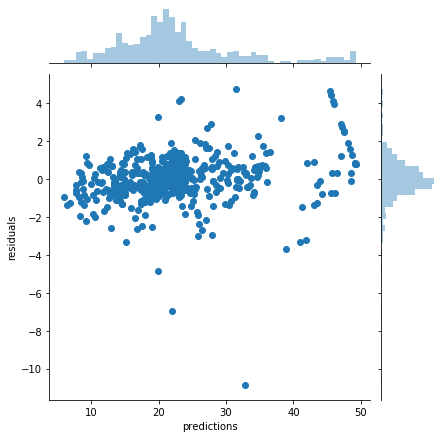

In [133]:
plot_residuals(ground_truth=y, predictions=predictions)

`bins` controlls the number of bins in the histograms:

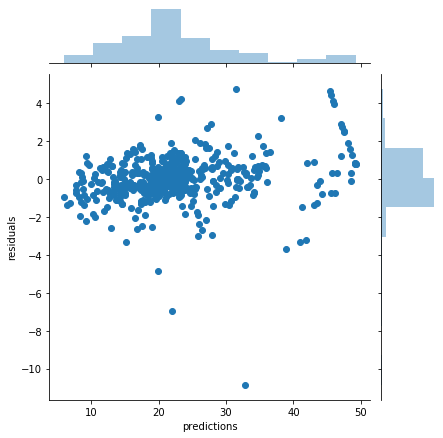

In [134]:
plot_residuals(ground_truth=y, predictions=predictions, bins=10)